# Importing libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [20]:
def load_data(path):

    if path.endswith('.csv'):
        print("Data loaded successful")
        return pd.read_csv(path)
    
    elif path.endswith('.xlsx'):
        print("Data loaded successful")
        return pd.read_excel(path)
    
    else:
        raise ValueError("Only CSV and Excel files are supported.")

path = input('Please input the the path of the data ')

try :
    dataFrame = load_data(path)
except exception as e:
    print("An error occurred while loading: ", str(e))
    exit(1)
    
# International_Report_Departures.csv

Please input the the path of the data International_Report_Departures.csv
Data loaded successful


#### copy data and show

In [21]:
df = dataFrame.copy()
df

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461


# Data Understanding

In [22]:
def understand_data (df):
    
    df_shape = df.shape
    print(f"Number of rows:", df_shape[0])
    print(f"Number of columns:", df_shape[1])
    print("-" * 60)
    print(f"Column names:", df.columns.tolist())
    print("-" * 60)
    print(f"Data information:", df.info())
    print("-" * 60)
    return pd.DataFrame(df.describe())

In [23]:
understand_data (df)

Number of rows: 930808
Number of columns: 16
------------------------------------------------------------
Column names: ['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac', 'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup', 'type', 'Scheduled', 'Charter', 'Total']
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


# check if contain Duplicate and null

In [24]:
def clean_data (df):
    if df.duplicated().sum() > 0:
        df.drop_duplicates(inplace=True)
    df.dropna(inplace= True)

In [25]:
clean_data (df)

In [26]:
def split_columns_by_datatype(df):

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    object_cols = df.select_dtypes(include=['object']).columns.tolist()
    return numeric_cols, object_cols

In [27]:
split_columns_by_datatype(df)

(['Year',
  'Month',
  'usg_apt_id',
  'usg_wac',
  'fg_apt_id',
  'fg_wac',
  'airlineid',
  'carriergroup',
  'Scheduled',
  'Charter',
  'Total'],
 ['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type'])

# Visualization

In [28]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

In [29]:
def plot_histogram(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [30]:
def plot_scatter(df, column1, column2):
    le = LabelEncoder()
    df_encoded = df.copy()
    df_encoded[column1] = le.fit_transform(df[column1])
    df_encoded[column2] = le.fit_transform(df[column2])

    plt.figure(figsize=(10, 6))
    plt.scatter(df_encoded[column1], df_encoded[column2])
    plt.title(f'Scatter Plot: {column1} vs {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

In [31]:
def visualize_data_by_type(df):
    
    numeric_columns, object_columns = split_columns_by_datatype(df)
    
    for col in numeric_columns:
        plt.hist(df[col], bins=20, edgecolor='black')
        plt.title(f'Histogram for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        
    for col2 in numeric_columns:
            if col != col2:
                plt.figure()
                plt.scatter(df[col], df[col2])
                plt.title(f'Scatter plot: {col} vs {col2}')
                plt.xlabel(col)
                plt.ylabel(col2)
                plt.show()
                
    for col in object_columns:
        
        if len(df[col].unique()) <= 10:
            value_counts = df[col].value_counts()
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
            plt.title(f'Pie Chart for {col}')
            plt.show()
        else:
            value_counts = df[col].value_counts()
            if len(value_counts) > 10:
                plt.figure(figsize=(12, 6))
                value_counts.plot(kind='bar')
                plt.title(f'Bar Chart for {col}')
                plt.xlabel(col)
                plt.ylabel('Count')
                plt.xticks(rotation=45)
                plt.show()



# MAIN

Please input the the path of the data International_Report_Departures.csv
Data loaded successful
Number of rows: 930808
Number of columns: 16
------------------------------------------------------------
Column names: ['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac', 'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup', 'type', 'Scheduled', 'Charter', 'Total']
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 

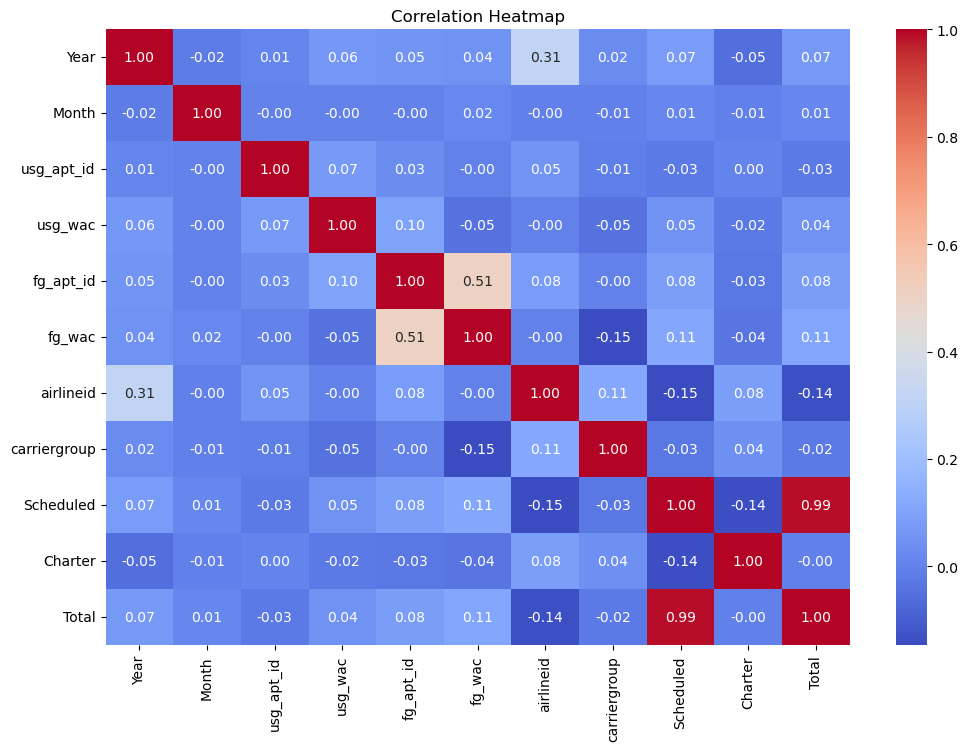

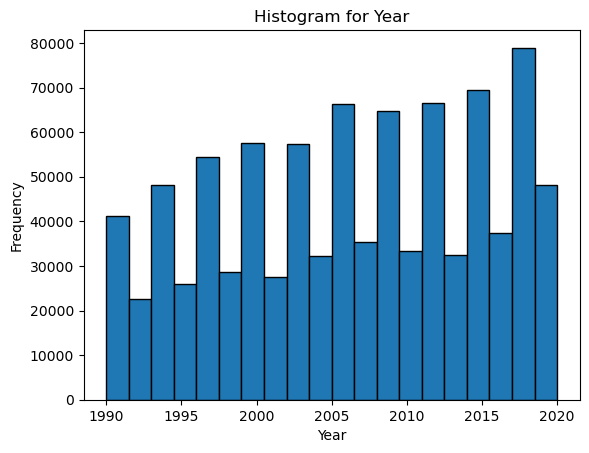

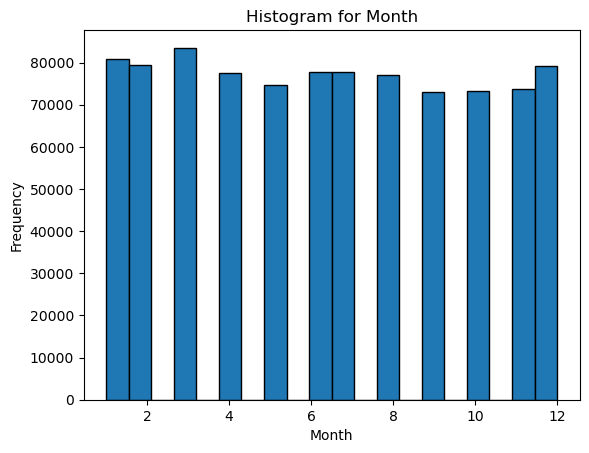

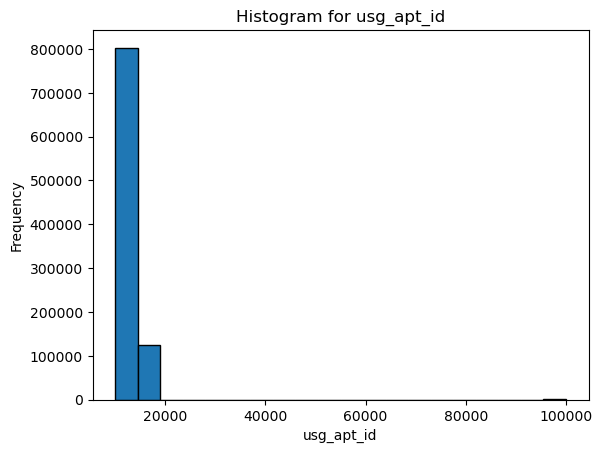

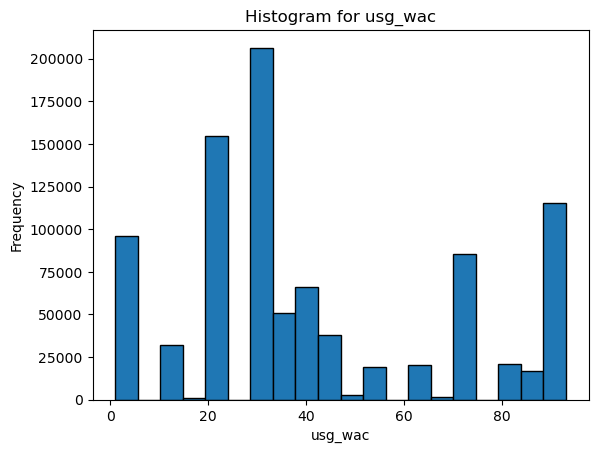

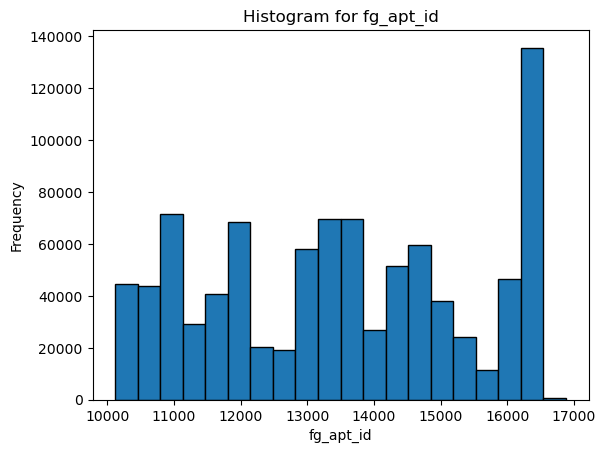

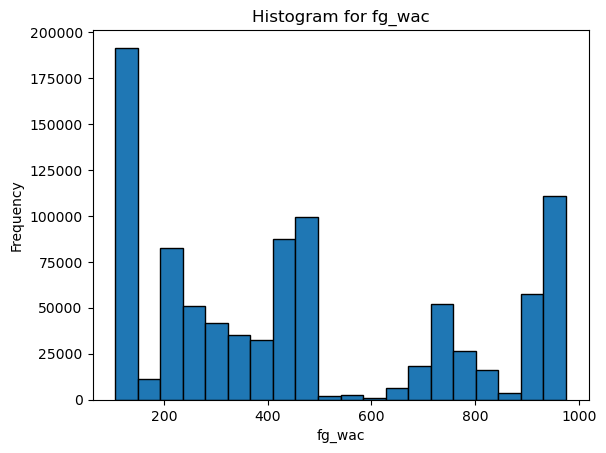

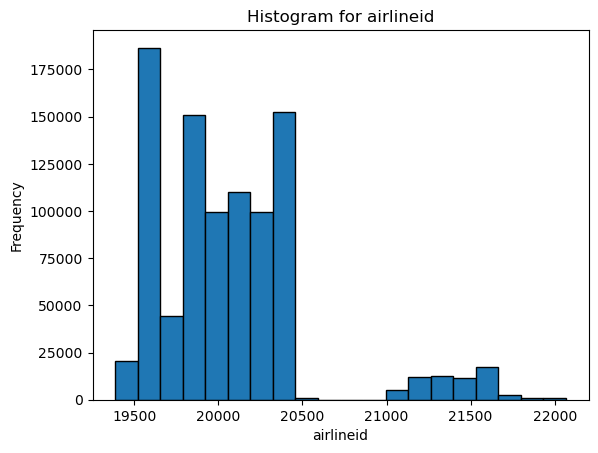

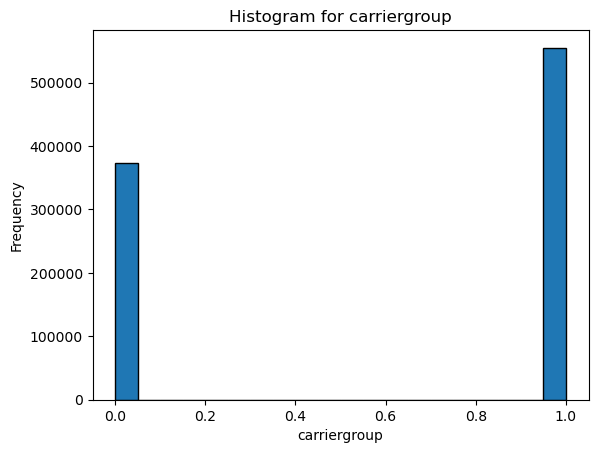

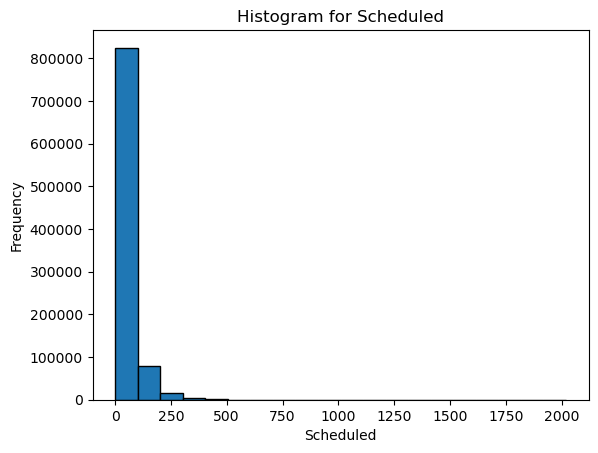

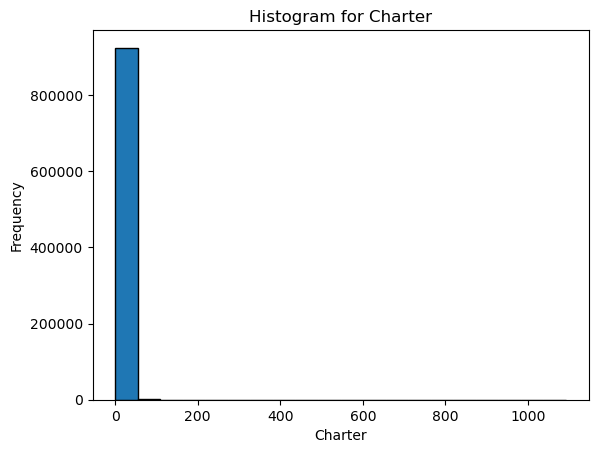

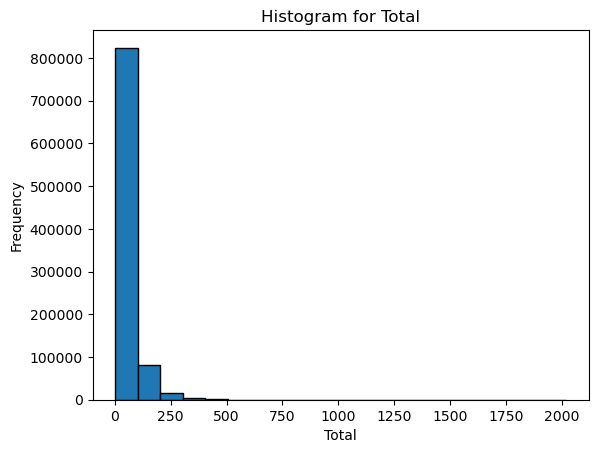

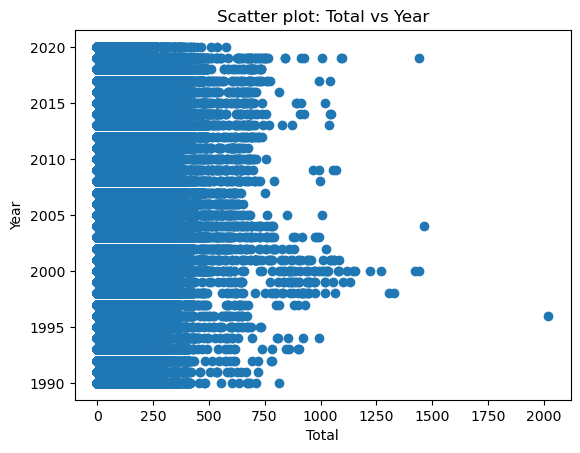

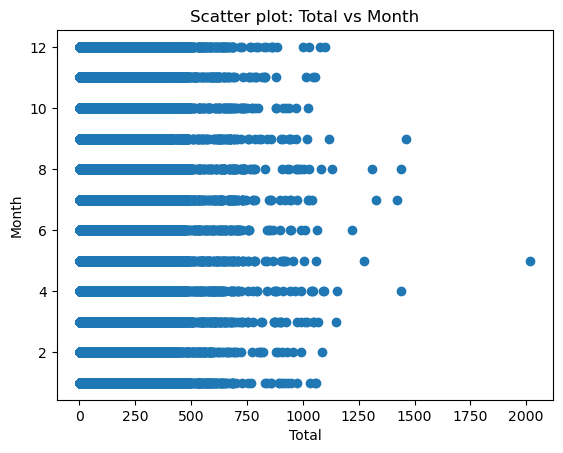

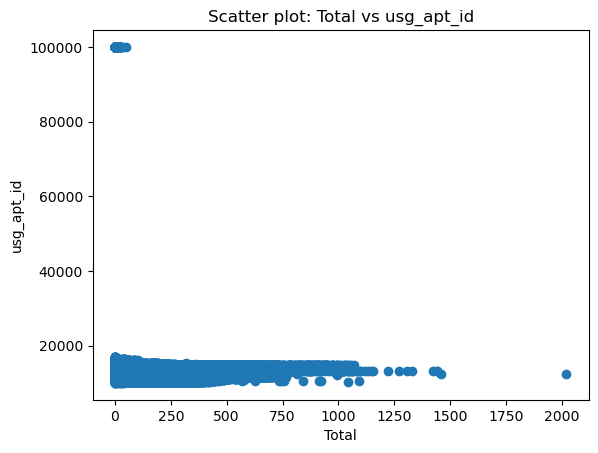

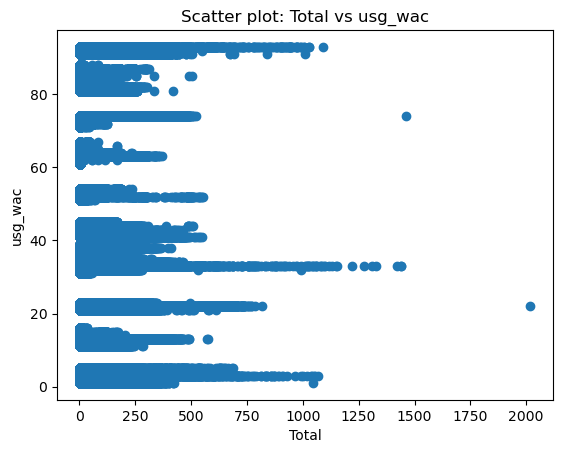

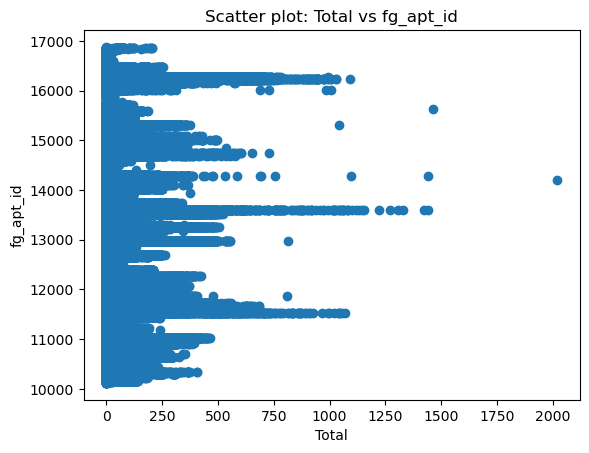

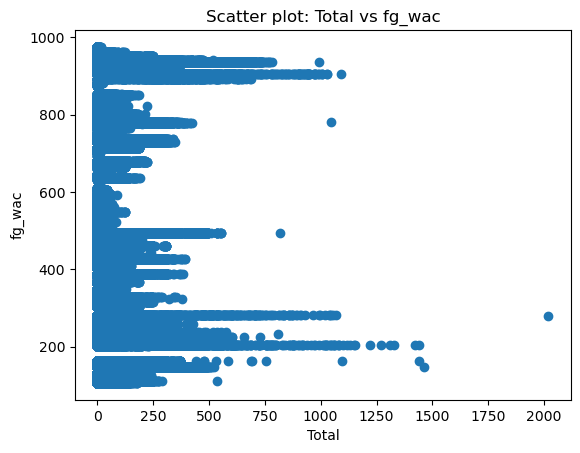

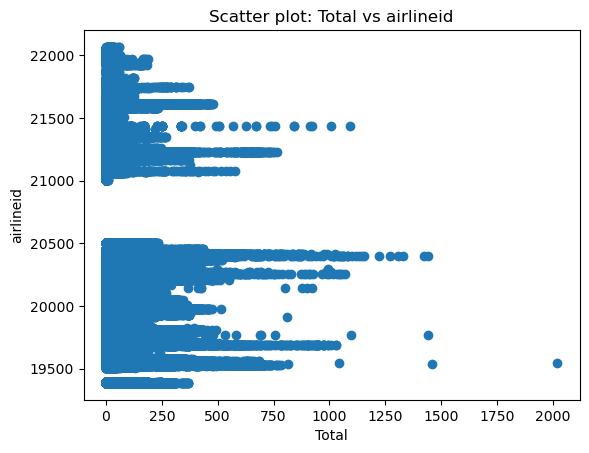

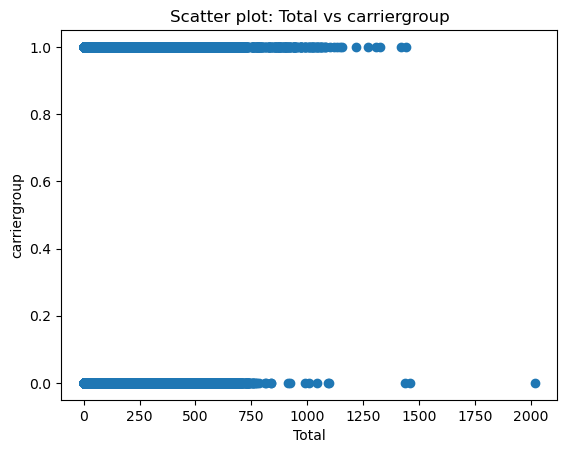

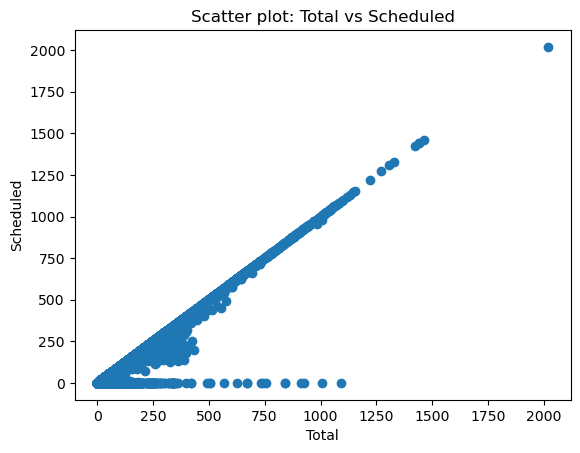

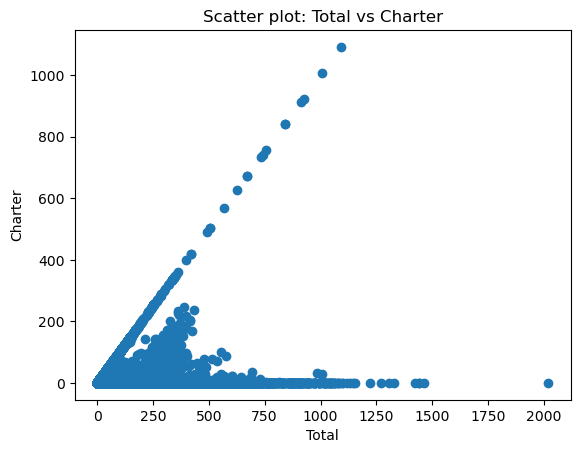

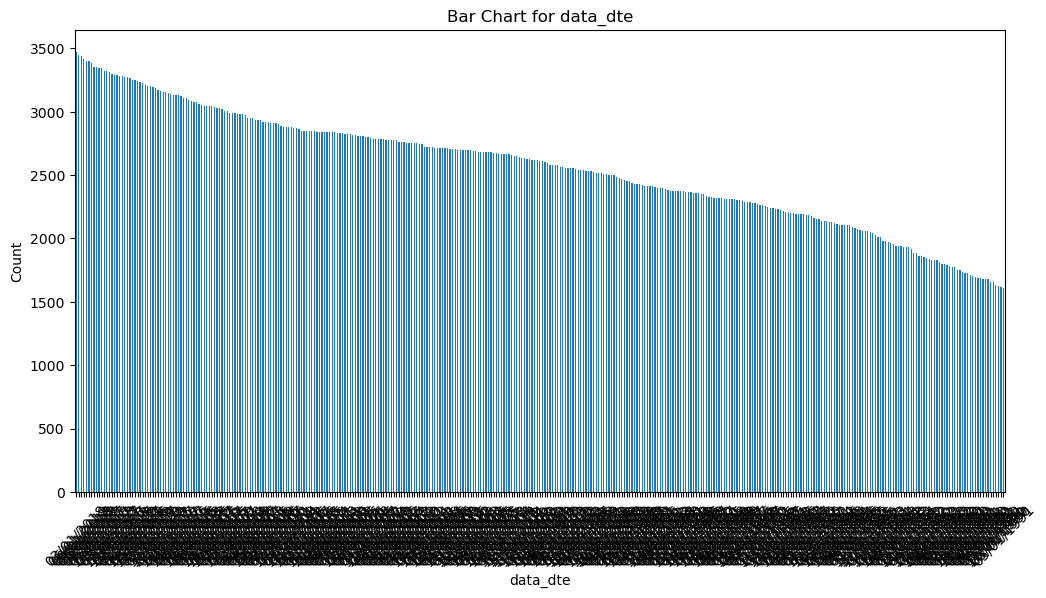

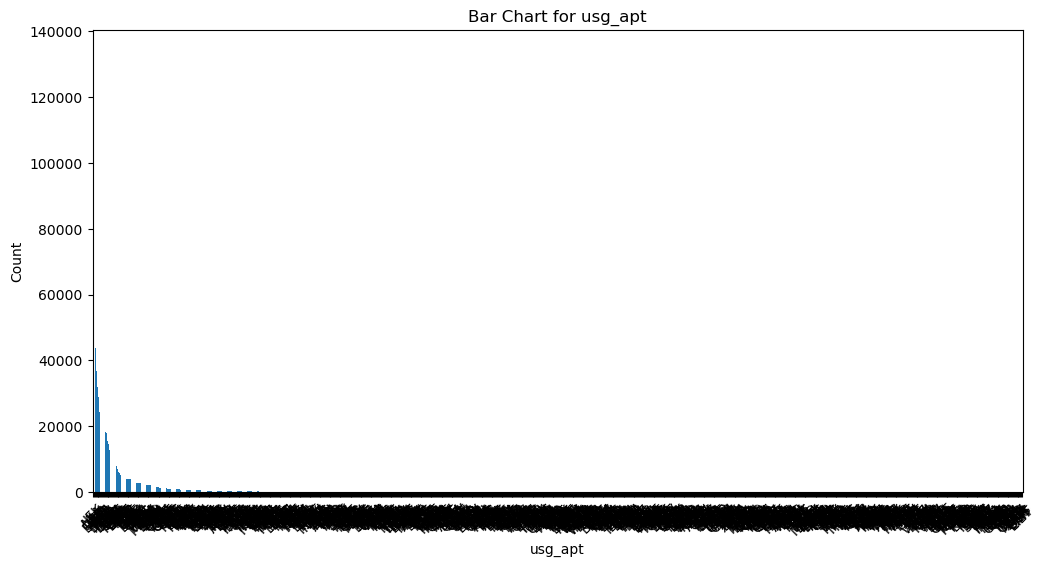

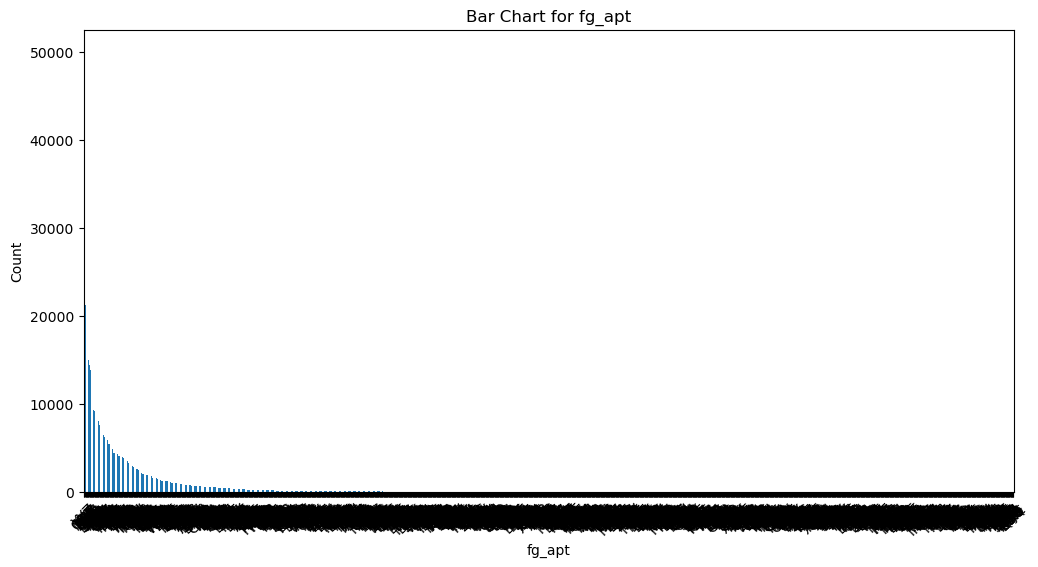

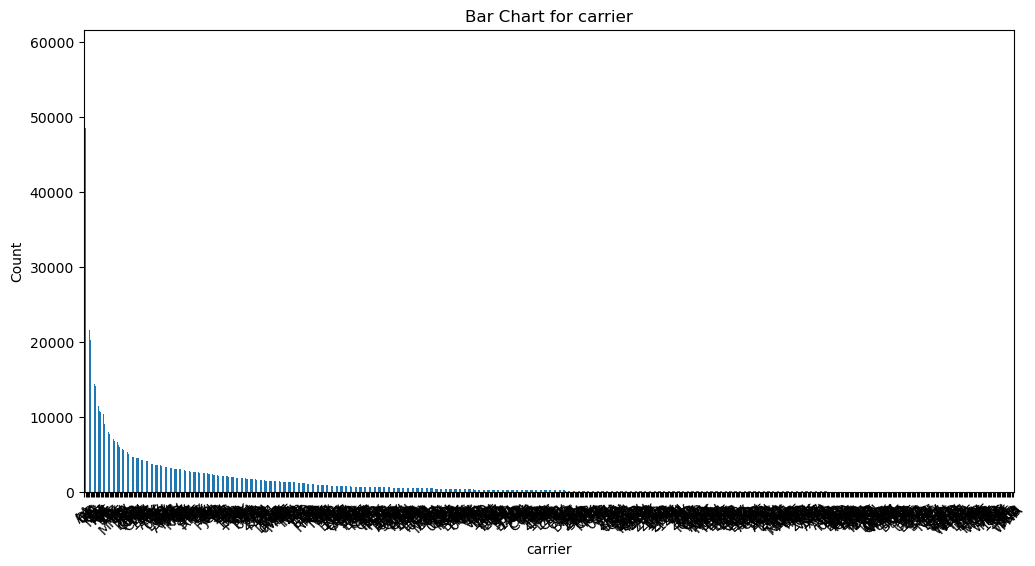

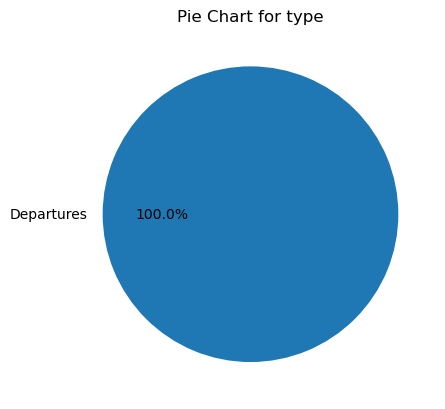

(['Year', 'Month', 'usg_apt_id', 'usg_wac', 'fg_apt_id', 'fg_wac', 'airlineid', 'carriergroup', 'Scheduled', 'Charter', 'Total'], ['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type'])
To plot a histogram for a specific numerical column
Enter Column name (or 'exit' to stop): airlineid


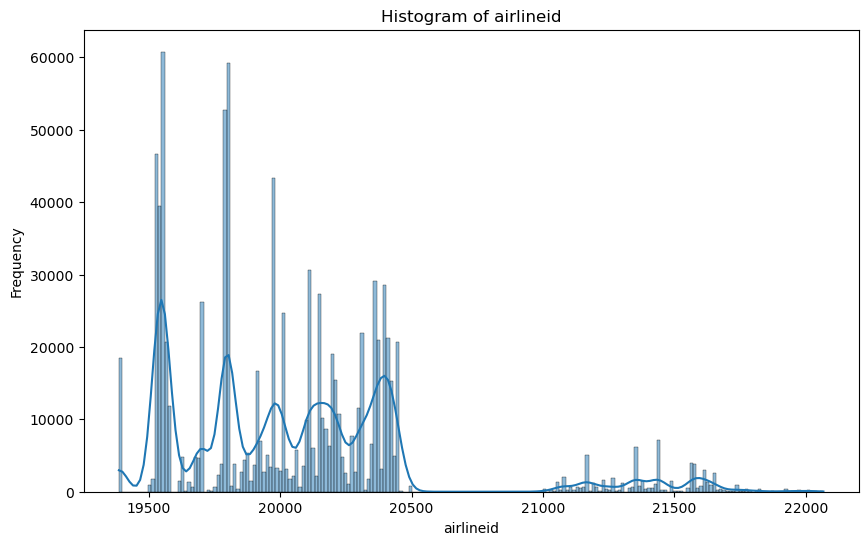

Enter Column name (or 'exit' to stop): Exit
Histogram plotting completed.
(['Year', 'Month', 'usg_apt_id', 'usg_wac', 'fg_apt_id', 'fg_wac', 'airlineid', 'carriergroup', 'Scheduled', 'Charter', 'Total'], ['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type'])
Enter the first column name (or 'exit' to stop): carrier
Enter the second column name: Total


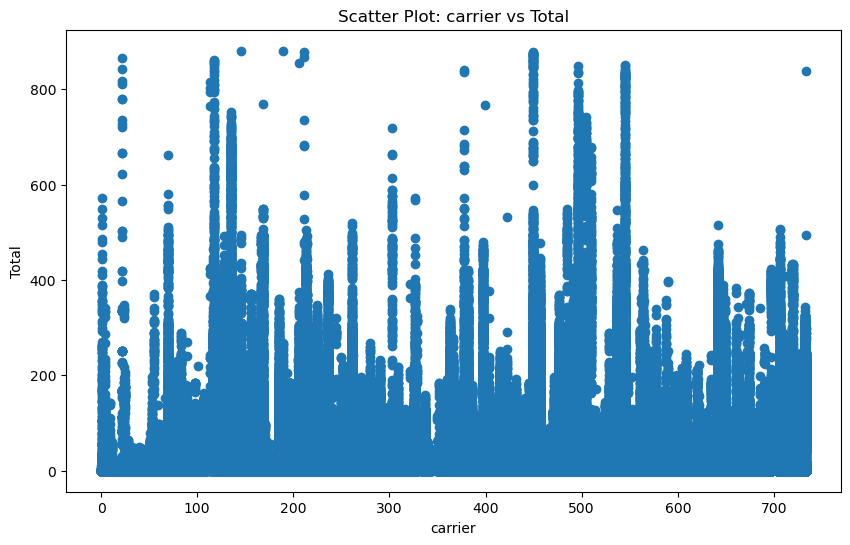

Enter the first column name (or 'exit' to stop): exit
Scatter Plotting completed.


In [32]:
def main():
    
    path = input('Please input the the path of the data ')

    try :
        dataFrame = load_data(path)
    except exception as e:
        print("An error occurred while loading: ", str(e))
        exit(1)

    df = dataFrame.copy()
    
    understand_data (df)
    clean_data (df)
    plot_correlation_heatmap(df)
    visualize_data_by_type(df)
    print(split_columns_by_datatype(df))
    
    print ("To plot a histogram for a specific numerical column")
    while True:
        column = input("Enter Column name (or 'exit' to stop): ")
        if column.lower() == 'exit':
            break
        elif column in df.columns:
            plot_histogram(df, column)
        else:
            print("Invalid column name. Please try again.")

    print("Histogram plotting completed.")
    
    print(split_columns_by_datatype(df))
    print ("To plot a Scatter for a specific columns")
    while True:
        column1 = input("Enter the first column name (or 'exit' to stop): ")
        if column1.lower() == 'exit':
            break

        column2 = input("Enter the second column name: ")
        if column1 in df.columns and column2 in df.columns:
            plot_scatter(df, column1, column2)
            
        else:
            print("Invalid column names. Please try again.")

    print("Scatter Plotting completed.")
    
    
if __name__ == "__main__":
    main()
#International_Report_Departures.csv